# Decision Tree - Hotel Reservations

In [137]:
# load libraries
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt

In [138]:
# read file using read_csv function
df = pd.read_csv('./Hotel_Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Basic EDA

In [139]:
# number of rows and columns
df.shape

(36275, 19)

In [140]:
# data type of each column
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [141]:
# summary of the data: column names, total no.of non-null values, data types, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [142]:
# summary statistics for numeric data types
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [143]:
# summary statistics for object data types
df.describe(include=['O'])

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


In [144]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [145]:
# count of duplicate rows
df[df.duplicated()].shape

(0, 19)

## Decision Tree

In [146]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [147]:
#droping the Booking ID column
df.drop(['Booking_ID'], axis=1, inplace=True)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [148]:
X = df.drop('booking_status', axis=1)
y = df['booking_status']

In [149]:
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0


In [150]:
y

0        Not_Canceled
1        Not_Canceled
2            Canceled
3            Canceled
4            Canceled
             ...     
36270    Not_Canceled
36271        Canceled
36272    Not_Canceled
36273        Canceled
36274    Not_Canceled
Name: booking_status, Length: 36275, dtype: object

In [151]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [16]:
# importing 'OneHotEncoder' to convert categorical variables into numerical values
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse=False)

# Apply the OneHotEncoder to the 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type' columns
X_train_encoded = onehot_encoder.fit_transform(X_train[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']])

X_test_encoded = onehot_encoder.fit_transform(X_test[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']])

/home/vboxuser/ds_class/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/vboxuser/ds_class/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [152]:
# importing 'OneHotEncoder' to convert categorical variables into numerical values
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse=False)

# Combine the original datasets before encoding
X_combined = pd.concat([X_train, X_test], axis=0)

# Apply one-hot encoding to the combined dataset
X_combined_encoded = onehot_encoder.fit_transform(X_combined[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']])

# Split the encoded dataset back into training and testing sets
X_train_encoded = X_combined_encoded[:len(X_train)]
X_test_encoded = X_combined_encoded[len(X_train):]

/home/vboxuser/ds_class/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [153]:
X_train_encoded_df = pd.DataFrame(X_train_encoded)
X_test_encoded_df = pd.DataFrame(X_test_encoded)# Display shapes before and after one-hot encoding
print("Shape of X_train before encoding:", X_train.shape)
print("Shape of X_test before encoding:", X_test.shape)
print("Shape of X_train_encoded:", X_train_encoded.shape)
print("Shape of X_test_encoded:", X_test_encoded.shape)

# Check unique values in the target variable
print("Unique values in y_train:", y_train.unique())
print("Unique values in y_test:", y_test.unique())


Shape of X_train before encoding: (29020, 17)
Shape of X_test before encoding: (7255, 17)
Shape of X_train_encoded: (29020, 13)
Shape of X_test_encoded: (7255, 13)
Unique values in y_train: ['Not_Canceled' 'Canceled']
Unique values in y_test: ['Canceled' 'Not_Canceled']


In [154]:
X_train_no_categorical = X_train.drop(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], axis=1)
X_test_no_categorical = X_test.drop(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], axis=1)

In [155]:
X_train_final = pd.concat([X_train_encoded_df, X_train_no_categorical], axis=1)
X_test_final = pd.concat([X_test_encoded_df, X_test_no_categorical], axis=1)

In [163]:
# Convert feature names to strings
X_train_final.columns = X_train_final.columns.astype(str)
X_test_final.columns = X_test_final.columns.astype(str)

In [164]:
# Check for missing values in original categorical columns
print("Missing values in X_train categorical columns:", X_train[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']].isnull().sum())
print("Missing values in X_test categorical columns:", X_test[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']].isnull().sum())

# Check for unique categories in each categorical column
for column in ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']:
    unique_train = set(X_train[column].unique())
    unique_test = set(X_test[column].unique())
    print(f"Unique categories in {column} - Train: {unique_train}, Test: {unique_test}")


Missing values in X_train categorical columns: type_of_meal_plan      0
room_type_reserved     0
market_segment_type    0
dtype: int64
Missing values in X_test categorical columns: type_of_meal_plan      0
room_type_reserved     0
market_segment_type    0
dtype: int64
Unique categories in type_of_meal_plan - Train: {'Meal Plan 2', 'Meal Plan 1', 'Not Selected', 'Meal Plan 3'}, Test: {'Meal Plan 1', 'Meal Plan 2', 'Not Selected'}
Unique categories in room_type_reserved - Train: {'Room_Type 2', 'Room_Type 5', 'Room_Type 3', 'Room_Type 6', 'Room_Type 1', 'Room_Type 4', 'Room_Type 7'}, Test: {'Room_Type 2', 'Room_Type 5', 'Room_Type 3', 'Room_Type 6', 'Room_Type 1', 'Room_Type 4', 'Room_Type 7'}
Unique categories in market_segment_type - Train: {'Online', 'Corporate', 'Aviation', 'Offline', 'Complementary'}, Test: {'Online', 'Corporate', 'Aviation', 'Offline', 'Complementary'}


In [165]:
# Display shapes before and after one-hot encoding
print("Shape of X_train before encoding:", X_train.shape)
print("Shape of X_test before encoding:", X_test.shape)
print("Shape of X_train_encoded:", X_train_encoded.shape)
print("Shape of X_test_encoded:", X_test_encoded.shape)

# Check unique values in the target variable
print("Unique values in y_train:", y_train.unique())
print("Unique values in y_test:", y_test.unique())


Shape of X_train before encoding: (29020, 17)
Shape of X_test before encoding: (7255, 17)
Shape of X_train_encoded: (29020, 13)
Shape of X_test_encoded: (7255, 13)
Unique values in y_train: ['Not_Canceled' 'Canceled']
Unique values in y_test: ['Canceled' 'Not_Canceled']


In [166]:
y_train

33338    Not_Canceled
1983         Canceled
4307     Not_Canceled
23335    Not_Canceled
17983    Not_Canceled
             ...     
19183        Canceled
4180     Not_Canceled
25773    Not_Canceled
3491     Not_Canceled
14100    Not_Canceled
Name: booking_status, Length: 29020, dtype: object

In [167]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [168]:
# Reindexing to align the indices
X_train_final = X_train_final.reindex(y_train_final.index)
X_test_final = X_test_final.reindex(y_test_final.index)

# Now check the shapes again
print("Shape of X_train_final:", X_train_final.shape)
print("Shape of y_train_final:", y_train_final.shape)
print("Shape of X_test_final:", X_test_final.shape)
print("Shape of y_test_final:", y_test_final.shape)

# import the decisiontree classifier algorithm
from sklearn.tree import DecisionTreeClassifier

# Train the classifier on the training data
model = DecisionTreeClassifier(criterion='entropy', random_state=44)
model.fit(X_train_final, y_train_final)

Shape of X_train_final: (29020, 27)
Shape of y_train_final: (29020, 1)
Shape of X_test_final: (7255, 27)
Shape of y_test_final: (7255, 1)


DecisionTreeClassifier(criterion='entropy', random_state=44)

In [125]:
y_train_final = pd.DataFrame(y_train_encoded)
y_test_final = pd.DataFrame(y_test_encoded)

In [169]:
y_train_final

,0
0,1
1,0
2,1
3,1
4,1
...,...
29015,0
29016,1
29017,1
29018,1


In [170]:
X_train_final

,0,1,2,3,4,5,6,7,8,9,...,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,224.0,2017.0,10.0,2.0,0.0,0.0,0.0,65.00,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,2018.0,11.0,6.0,0.0,0.0,0.0,106.68,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2018.0,2.0,28.0,0.0,0.0,0.0,60.00,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,211.0,2018.0,5.0,20.0,0.0,0.0,0.0,100.00,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,42.0,2018.0,4.0,23.0,0.0,0.0,0.0,118.80,1.0
29017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,134.0,2017.0,12.0,4.0,0.0,0.0,0.0,65.00,0.0
29018,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,50.0,2018.0,5.0,31.0,0.0,0.0,0.0,149.40,1.0


In [171]:
X_test_final

,0,1,2,3,4,5,6,7,8,9,...,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,48.0,2018.0,4.0,11.0,0.0,0.0,0.0,94.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,39.0,2018.0,1.0,1.0,0.0,0.0,0.0,91.13,0.0
7252,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Building Decision Tree Classifier using Entropy as a Criterion

In [172]:
print("Number of samples in X_train_final:", X_train_final.shape[0])
print("Number of samples in y_train_final:", y_train_final.shape[0])

Number of samples in X_train_final: 29020
Number of samples in y_train_final: 29020


In [173]:
print("Missing values in X_train_final:", X_train_final.isnull().sum())
print("Missing values in y_train_final:", y_train_final.isnull().sum())

Missing values in X_train_final: 0                                          0
1                                          0
2                                          0
3                                          0
4                                          0
5                                          0
6                                          0
7                                          0
8                                          0
9                                          0
10                                         0
11                                         0
12                                         0
no_of_adults                            5753
no_of_children                          5753
no_of_weekend_nights                    5753
no_of_week_nights                       5753
required_car_parking_space              5753
lead_time                               5753
arrival_year                            5753
arrival_month                           5753
arrival_date          

In [174]:
print("Shape of X_train_final:", X_train_final.shape)
print("Shape of y_train_final:", y_train_final.shape)

Shape of X_train_final: (29020, 27)
Shape of y_train_final: (29020, 1)


In [133]:
# import the decisiontree classifier algorithm
from sklearn.tree import DecisionTreeClassifier

# Train the classifier on the training data
model = DecisionTreeClassifier(criterion='entropy', random_state=44)
model.fit(X_train_final, y_train_final)

ValueError: Number of labels=29020 does not match number of samples=34773

[Text(0.4717606417618938, 0.9903846153846154, 'x[12] <= 0.5\nentropy = 0.912\nsamples = 29020\nvalue = [9485, 19535]'),
 Text(0.14228630146685836, 0.9711538461538461, 'x[11] <= 0.5\nentropy = 0.829\nsamples = 10439\nvalue = [2733, 7706]'),
 Text(0.02938679032718665, 0.9519230769230769, 'x[21] <= 13.5\nentropy = 0.478\nsamples = 2022\nvalue = [208, 1814]'),
 Text(0.028223423057151528, 0.9326923076923077, 'x[25] <= 62.9\nentropy = 0.534\nsamples = 1086\nvalue = [132, 954]'),
 Text(0.027891032408570066, 0.9134615384615384, 'entropy = 0.258\nsamples = 46\nvalue = [2, 44]'),
 Text(0.028555813705732992, 0.9134615384615384, 'x[25] <= 63.56\nentropy = 0.544\nsamples = 1040\nvalue = [130, 910]'),
 Text(0.028223423057151528, 0.8942307692307693, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.028888204354314453, 0.8942307692307693, 'x[10] <= 0.5\nentropy = 0.539\nsamples = 1037\nvalue = [128, 909]'),
 Text(0.028223423057151528, 0.875, 'x[9] <= 0.5\nentropy = 0.435\nsamples = 223\nvalue =

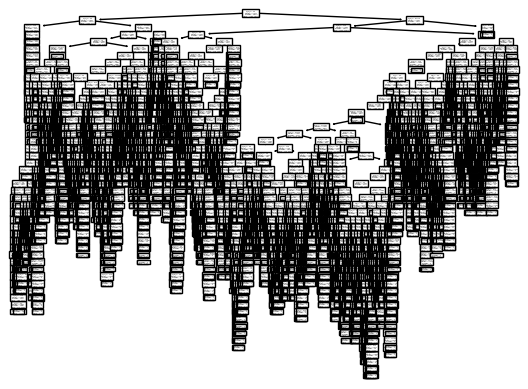

In [32]:
# visualizing decision tree
from sklearn import tree

tree.plot_tree(model)

### Prediction on Test data

In [175]:
# make predictions on the test data

preds = model.predict(X_test_final)
preds

array([1, 1, 1, ..., 1, 1, 1])

In [178]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test_final, preds)
classification_report_result = classification_report(y_test_final, preds)
confusion_matrix_result = confusion_matrix(y_test_final, preds)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

Accuracy: 0.6555478980013784
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.07      0.11      2400
           1       0.67      0.95      0.79      4855

    accuracy                           0.66      7255
   macro avg       0.53      0.51      0.45      7255
weighted avg       0.58      0.66      0.56      7255

Confusion Matrix:
 [[ 161 2239]
 [ 260 4595]]


In [180]:
# make predictions on the training data

train_preds = model.predict(X_train_final)
train_preds

array([1, 0, 0, ..., 1, 1, 1])

In [181]:
train_accuracy = accuracy_score(y_train_final, train_preds)
train_classification_report_result = classification_report(y_train_final, train_preds)
train_confusion_matrix_result = confusion_matrix(y_train_final, train_preds)

print(f"Training Accuracy: {train_accuracy}")
print("Training Classification Report:\n", train_classification_report_result)
print("Training Confusion Matrix:\n", train_confusion_matrix_result)

Training Accuracy: 0.8093728463128876
Training Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.53      0.64      9485
           1       0.80      0.95      0.87     19535

    accuracy                           0.81     29020
   macro avg       0.82      0.74      0.76     29020
weighted avg       0.81      0.81      0.80     29020

Training Confusion Matrix:
 [[ 4993  4492]
 [ 1040 18495]]
